# Customer Churn Analysis 

This notebook performs data preparation, segmentation, and churn probability calculations for a telecom dataset. The outputs are used to build a Tableau dashboard for customer retention insights.


### Step 1: Data Cleaning & Preprocessing

In [15]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Preview the dataset
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Check data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
# Drop customerID (not useful for modeling)
df.drop(columns=['customerID'], inplace=True)

In [19]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [22]:
# Convert target column (Churn) to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [23]:
# Convert binary "Yes"/"No" columns to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'gender' column to binary
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Define categorical columns to one-hot encode (excluding numeric ones)
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']

# One-hot encode only the selected categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Final check
print("Final shape:", df.shape)
df.head()


Final shape: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


## Step 2: Exploratory Data Analysis (EDA)


#### Churn Distribution: Balance of churned vs non-churned customers 

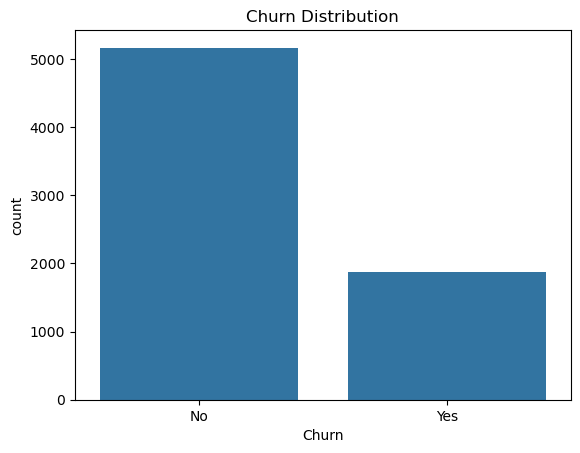

Overall churn rate: 26.58%


In [24]:
# Churn counts
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# % churned
churn_rate = df['Churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")


#### Numeric Feature Trends by Churn: Comparison MonthlyCharges and Tenure

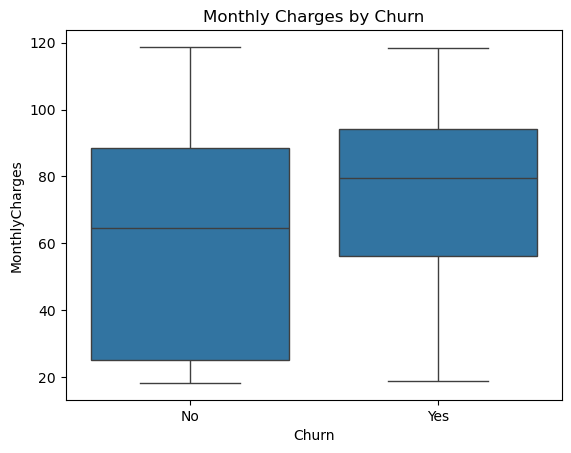

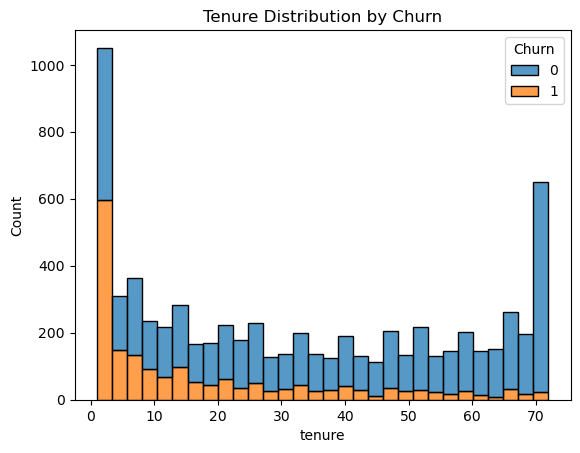

In [25]:
# Boxplot of MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Histogram of tenure
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()


#### Churn by Contract Type

In [26]:
# Churn % by contract
contract_churn = df.groupby(['Contract_One year', 'Contract_Two year'])['Churn'].mean().reset_index()
print(contract_churn)


   Contract_One year  Contract_Two year     Churn
0              False              False  0.427097
1              False               True  0.028487
2               True              False  0.112772


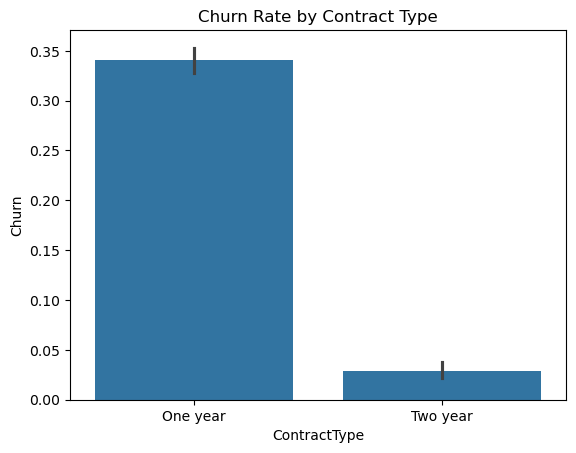

In [27]:
# Create labels
df['ContractType'] = df[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df['ContractType'] = df['ContractType'].replace({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
})
df['ContractType'] = df['ContractType'].fillna('Month-to-month')

# Plot churn rate by contract type
sns.barplot(x='ContractType', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()


#### Churn by Payment Method

In [28]:
# Payment method churn comparison
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]
for col in payment_cols:
    rate = df[df[col]==1]['Churn'].mean()
    print(f"{col}: {rate:.2%}")


PaymentMethod_Credit card (automatic): 15.25%
PaymentMethod_Electronic check: 45.29%
PaymentMethod_Mailed check: 19.20%


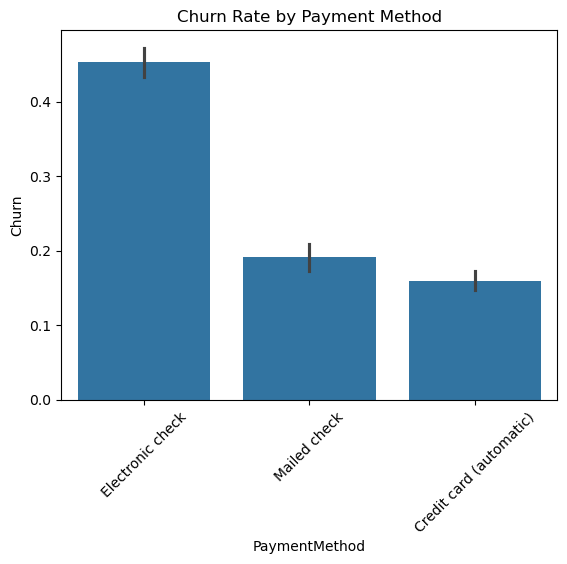

In [29]:
# Create column with dominant payment method
df['PaymentMethod'] = df[payment_cols].idxmax(axis=1).str.replace('PaymentMethod_', '')
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()


#### Correlation Heatmap

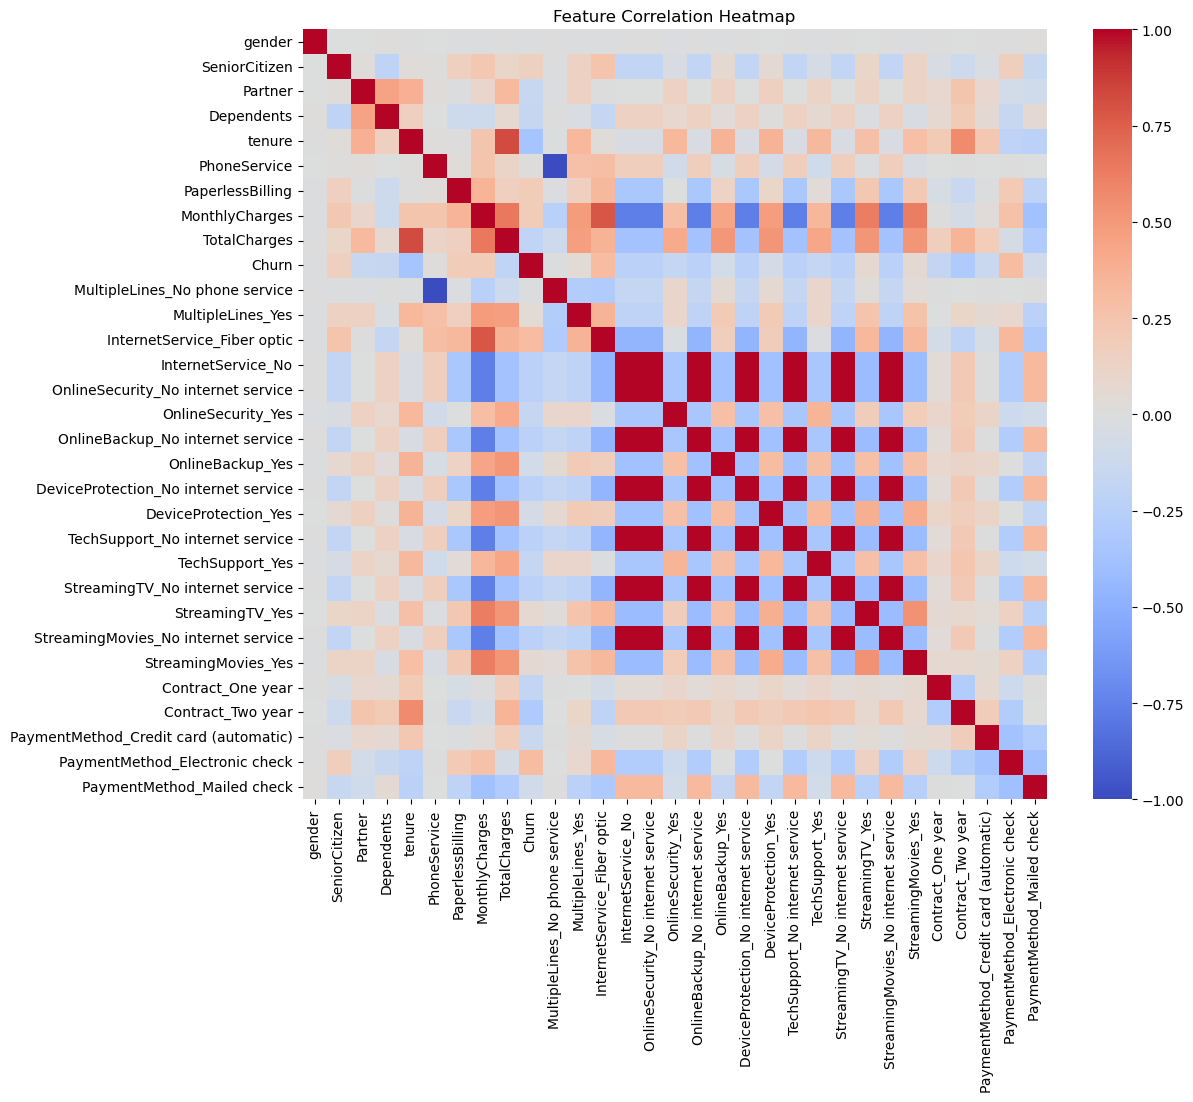

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


## Step 3: Model Building & Evaluation

In [73]:
#Remove Non-Numeric Features for Modeling
non_numeric = X.select_dtypes(include='object').columns
print(non_numeric)


Index([], dtype='object')


In [74]:
X = X.drop(columns=non_numeric)


In [76]:
# Separate features (X) and target variable (y) for modeling
X = df.drop(columns=['Churn'])
y = df['Churn']


In [75]:
#train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Logistic regression model 

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/opt/anaconda3/envs/gba462p/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# AUC score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.2f}")


[[915 118]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC: 0.83


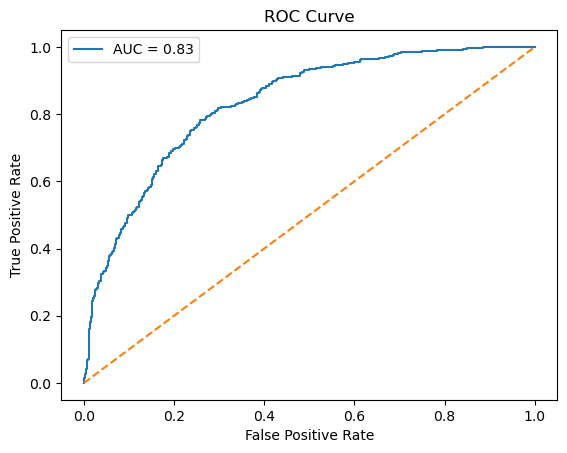

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [42]:
#Preparing for tableau
X_test_copy = X_test.copy()
X_test_copy['Churn_Probability'] = y_proba
X_test_copy['Actual_Churn'] = y_test.values

# Copy the test set
X_test_copy = X_test.copy()

# Add predicted churn probabilities
X_test_copy['Churn_Probability'] = model.predict_proba(X_test)[:, 1]

# Add actual churn label
X_test_copy['Actual_Churn'] = y_test.values


X_test_copy['ContractType'] = df.loc[X_test_copy.index, 'ContractType']

#export for tableau
X_test_copy.to_csv("churn_predictions_for_tableau.csv", index=False)


## Step 4: Model Comparison 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [52]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}
# Train and evaluate each
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} AUC: {auc:.3f}")

/opt/anaconda3/envs/gba462p/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC: 0.832
Decision Tree AUC: 0.670
Random Forest AUC: 0.818


In [79]:
y_pred = model.predict(X_test)
print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-" * 50)


Random Forest Confusion Matrix:
 [[934  99]
 [202 172]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

--------------------------------------------------


## Step 5: K-Means Clustering for Customer Segmentation

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
cluster_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cluster_features])


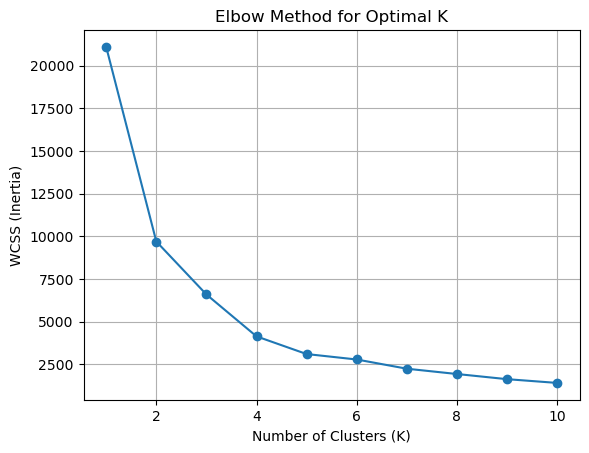

In [57]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# Plot WCSS vs K
import matplotlib.pyplot as plt

plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [68]:
# Assuming model is best classifier
df['Churn_Probability'] = model.predict_proba(X)[:, 1]
df['Actual_Churn'] = y.values  # original churn values
df['ContractType'] = df[['Contract_One year', 'Contract_Two year']].apply(
    lambda row: 'Two year' if row['Contract_Two year'] == 1 else (
        'One year' if row['Contract_One year'] == 1 else 'Month-to-month'
    ), axis=1
)


In [80]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['CustomerSegment'] = kmeans.fit_predict(df[['tenure', 'MonthlyCharges']])


In [70]:
# Summary of each segment
segment_summary = df.groupby('CustomerSegment')[cluster_features + ['Churn']].mean()
segment_summary['ChurnRate'] = df.groupby('CustomerSegment')['Churn'].mean()
segment_summary


,tenure,MonthlyCharges,TotalCharges,Churn,ChurnRate
CustomerSegment,,,,,
0,58.608585,93.279356,5472.480812,0.159428,0.159428
1,10.758877,32.590750,343.590034,0.245132,0.245132
2,54.335664,34.073470,1843.220017,0.048077,0.048077
3,14.804577,81.112037,1207.309771,0.491533,0.491533


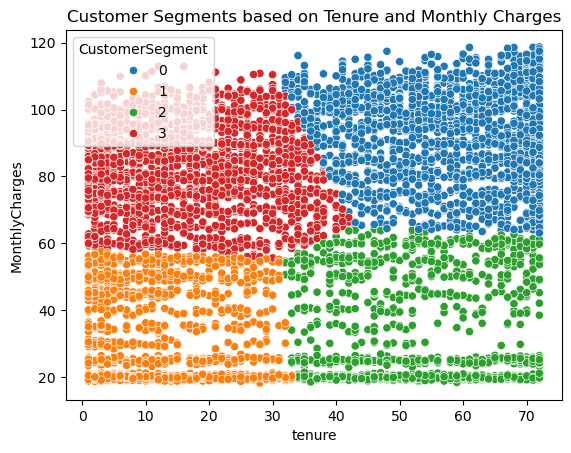

In [71]:
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='CustomerSegment', palette='tab10')
plt.title('Customer Segments based on Tenure and Monthly Charges')
plt.show()


## Step 6: Export for Tableau

In [81]:

df.to_csv("churn_predictions_with_segments.csv", index=False)
